# Simulation of the 1D Shrodinger Equation using Quantum Computers

In this tutorial, we are simulating the time-evolution for one-dimensional single particle quantum systems on quantum computers. We will be using the python library for Quantum Information Science (QISKit).

Recalling the time-dependent schrodinger equation

\begin{equation} \tag{1}
H |\psi(t) \rangle = \imath \hbar \frac{\partial}{\partial t} |\psi(t) \rangle
\end{equation}

For time-independent Hamiltonian $H$,

\begin{equation} \tag{2}
H = K + V = \frac{p^2}{2m} + V
\end{equation}

we have

\begin{equation} \tag{3}
|\psi(t) \rangle = \mathbf{e}^{-\imath Ht} |\psi(0) \rangle
\end{equation}

By Trotter Formula, we have

\begin{equation} \tag{4}
|\psi(t) \rangle = \mathbf{e}^{-\imath (K+V)t} |\psi(0) \rangle = \left ( \mathbf{e}^{-\imath K \Delta t} \mathbf{e}^{-\imath V \Delta t} \mathbf{e}^{O \left(\Delta t^2 \right)}\right) ^{\frac{t}{\Delta t}} |\psi(0) \rangle
\end{equation}

## Initialization

We initialize the wavefunction over a series of $N$ qubits. Therefore, we confine the particle to the positions range $-d \leq x \leq d$. We take equal intervals of 

\begin{equation} \tag{5}
\Delta = \frac{2d}{2^{N}}
\end{equation}

where $2^{N}$ is the number of intervals. The wavefunction can then be discretised by

\begin{equation} \tag{6}
\sum_{k=0}^{2^{N}-1} c_k(t) | k \rangle = \frac{1}{\mathcal{N}}\sum_{k=0}^{2^{N}-1} \psi(x_k, t) |k\rangle
\end{equation}

where, $| k \rangle$ is the computational basis, and

\begin{equation} \tag{7}
x_k \dot{=} - d + \left ( k + \frac{1}{2} \right) \Delta
\end{equation}

and, the normalization constant $\mathcal{N}$

\begin{equation} \tag{8}
\mathcal{N} \equiv \sqrt{\sum_{k=0}^{2^{N}-1} | \psi(x_k, t)|^2 }
\end{equation}

## The Kinetic Operator

The Kinetic part of the hamiltonian

\begin{equation} \tag{9}
   K = \frac{p^2}{2m} = - \frac{\hbar^2}{2m} \frac{d^2}{dx^2}
\end{equation}

where, the momentum operator

\begin{equation} \tag{10}
  p =  \imath \hbar \frac{d}{dx}
\end{equation}

The position $x$ and momentum $p$ operators are related by the Quantum Fourier Transform $F$ as
 
\begin{equation} \tag{11}
    p = F x F^{\dagger}
\end{equation}

Then, the Kinetic Energy Operator becomes

\begin{equation} \tag{12}
    \mathbf{e}^{-\imath K \Delta t / \hbar} = F \mathbf{e}^{-\imath x^2 \Delta t / 2m \hbar} F^\dagger
\end{equation}

Any integer $k$ can be written in Boolean form as

\begin{equation} \tag{13}
    k = k_{n-1} 2^{n-1} + \cdots + k_1 2^1 + k_0 2^0; \;\;\; k_i \in \{0,1 \}
\end{equation}

By Eq(7), we can write the position $x$ as

\begin{equation} \tag{14}
    x = -d + \left[ \left( \sum_{j=0}^{N-1} k_j 2^j \right) + \frac{1}{2} \right] \Delta = \alpha \sum_{j=0}^{N-1} \left( k_j 2^j + \beta \right)
\end{equation}

where, 

\begin{equation} \tag{15}
    \alpha = \Delta
\end{equation}

and,

\begin{equation} \tag{16}
    \beta = \frac{-d + \Delta/2}{ \Delta N} = \frac{1-2^N}{2N}
\end{equation}

Therefore,

\begin{equation} \tag{17}
    \mathbf{e}^{-\imath x^2 \Delta t / 2m \hbar} = \prod_{j,l=0}^{N-1} \mathbf{e}^{-\imath \gamma (k_j 2^j + \beta)( k_l + 2^l + \beta)}
\end{equation}

where,

\begin{equation} \tag{18}
    \gamma = \frac{\alpha^2 \Delta t}{2m \hbar}
\end{equation}

To write operator (17) in the Ising format, we make the replacement

\begin{equation} \tag{19}
    k_i = \frac{I - Z_i}{2}; \;\;\; Z_i \in \{-1,1\}
\end{equation}

Then, we have

\begin{equation} \tag{20}
    (k_j 2^j + \beta)(k_l 2^l + \beta) \\
    = \frac{1}{\gamma} \left [ (\theta_{j,l} + \theta_j + \theta_l + \beta^2) I - (\theta_{j,l} + \theta_j) Z_j - (\theta_{j,l} + \theta_l) Z_l + \theta_{j,l}Z_j Z_l \right]
\end{equation}

where, $I$ is the identity operator and $Z_i$ is the Pauli-$Z$ operator at qubit $i$, and

\begin{equation} \tag{21}
    \theta_{j,l} =  \theta_{l,j} = \gamma \,2^{j+l-2}
\end{equation}

and,

\begin{equation} \tag{22}
    \theta_j = \gamma\, \beta\, 2^{j-1}
\end{equation}

Substituting by Eq(20) into Eq(17) to give

\begin{equation} \tag{23}
    \mathbf{e}^{-\imath x^2 \Delta t / 2m \hbar} = \prod_{j,l=0}^{N-1} \mathbf{e}^{\imath (\theta_{j,l} + \theta_j) Z_j} \; \mathbf{e}^{-\imath \theta_{j,l} Z_j Z_l} \; \mathbf{e}^{\imath (\theta_{j,l} + \theta_l) Z_l}
\end{equation}

where, we have ignored the global phase factor. By Eq(12), the Kinetic operator becomes

\begin{equation} \tag{24}
    \mathbf{e}^{-\imath K \Delta t / \hbar} = \prod_{j,l=0}^{N-1} F\, \mathbf{e}^{\imath (\theta_{j,l} + \theta_j) Z_j} \; \mathbf{e}^{-\imath \theta_{j,l} Z_j Z_l} \; \mathbf{e}^{\imath (\theta_{j,l} + \theta_l) Z_l} \, F^\dagger
\end{equation}

### The Quantum Fourier Transform

Suppose we have two vectors $X = \{x_0, x_1, \cdots, x_k, \cdots, x_{N-1} \}$ and $\tilde{X} = \{\tilde{x}_0, \tilde{x}_1, \cdots, \tilde{x}_k, \cdots, \tilde{x}_{N-1} \}$.

The discrete Fourier Transform, DFT, maps elements of $X$ to elements of $\tilde{X}$, such that

\begin{equation} \tag{25}
\tilde{x}_k = \sum_{j=0}^{N-1} x_j \; \mathbf{e}^{2 \pi \imath k j /N}
\end{equation}

We can define the Quantum Fourier transform as 

\begin{equation} \tag{26}
F | x \rangle = \frac{1}{2^{n/2}} \sum_{k=0}^{N-1} \mathbf{e}^{2 \pi \imath k j /2^n} | k \rangle \\ 
= \frac{1}{2^{n/2}} \sum_{k_1=0}^{1} \cdots \sum_{k_n=0}^{1} \mathbf{e}^{2 \pi \imath x \left( \sum_{l=1}^{n} k_l 2^{-l} \right)} | k_1 \cdots k_n \rangle \\
= \frac{1}{2^{n/2}} \sum_{k_1=0}^{1} \cdots \sum_{k_n=0}^{1} \bigotimes_{l=1}^{n} \mathbf{e}^{2 \pi \imath x  2^{-l}} | k_l \rangle \\
= \frac{1}{2^{n/2}} \bigotimes_{l=1}^{n} \left[ \sum_{k_l=0}^{1} \mathbf{e}^{2 \pi \imath x k_l 2^{-l}} | k_l \rangle \right] \\
= \frac{1}{2^{n/2}} \bigotimes_{l=1}^{n} \left[|0 \rangle + \mathbf{e}^{2 \pi \imath x 2^{-l}} | 1 \rangle \right]
\end{equation}

We define

\begin{equation} \tag{27}
\phi_n = \frac{2 \pi}{2^n}
\end{equation}

Then, the Quantum Fourier Transfrom, F, can be implemented using Hadamard and controlled phase shift gates as shown below

<img src="img/fig7.jpg" width=400 height=300 />

Then, Inverse Quantum Fourier Transform, $F^\dagger$, is implemented by a similar circuit, except, we make the transformation $\phi_n \rightarrow -\phi_n$.

### Example

For $N=2$, we have
 
\begin{equation} \tag{28}
    \mathbf{e}^{-\imath x^2 \Delta t / 2m \hbar} = \mathbf{e}^{-\imath \tilde{\theta}_0 Z_0/2} \; \mathbf{e}^{-\imath \tilde{\theta}_{0,1} Z_0 Z_1/2} \; \mathbf{e}^{-\imath \tilde{\theta}_1 Z_1/2}
\end{equation}

where,

\begin{equation} \tag{29}
    \tilde{\theta}_0 = -2(2\theta_{0,0} + 2\theta_{0,1} + 4 \theta_0) = -2(2\theta_{0,0} + 2\theta_{1,0} + 4 \theta_0)
\end{equation}

\begin{equation} \tag{30}
    \tilde{\theta}_{0,1} = 4 \theta_{0,1} = 4 \theta_{1,0}
\end{equation}

\begin{equation} \tag{31}
    \tilde{\theta}_1 = -2(2\theta_{1,1} + 2\theta_{0,1} + 4 \theta_1) = -2(2\theta_{1,1} + 2\theta_{1,0} + 4 \theta_1)
\end{equation}

Recalling the transformation

\begin{equation} \tag{32}
    CX_{0,2} \, CX_{1,2} \, \mathbf{e}^{-\imath \theta Z_2} \, CX_{1,2} \, CX_{0,2} = \mathbf{e}^{CX_{0,2} \, CX_{1,2} \, Z_2 \, CX_{1,2} \, CX_{0,2}} = \mathbf{e}^{-\imath \theta Z_0 Z_1}
\end{equation}

Then, Eq(24) becomes

\begin{equation} \tag{33}
    \mathbf{e}^{-\imath x^2 \Delta t / 2m \hbar} = \mathbf{e}^{-\imath \tilde{\theta}_0 Z_0/2} \, CX_{0,2} \, CX_{1,2} \, \mathbf{e}^{-\imath \tilde{\theta}_{0,1} Z_2/2} \, CX_{1,2} \, CX_{0,2} \; \mathbf{e}^{-\imath \tilde{\theta}_1 Z_1/2}
\end{equation}

Therefore, the quantum circuit for the kinetic operator of $2$ qubits

<img src="img/kin_op.jpg" width=500 height=300 />

In [1]:
import qiskit as q
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

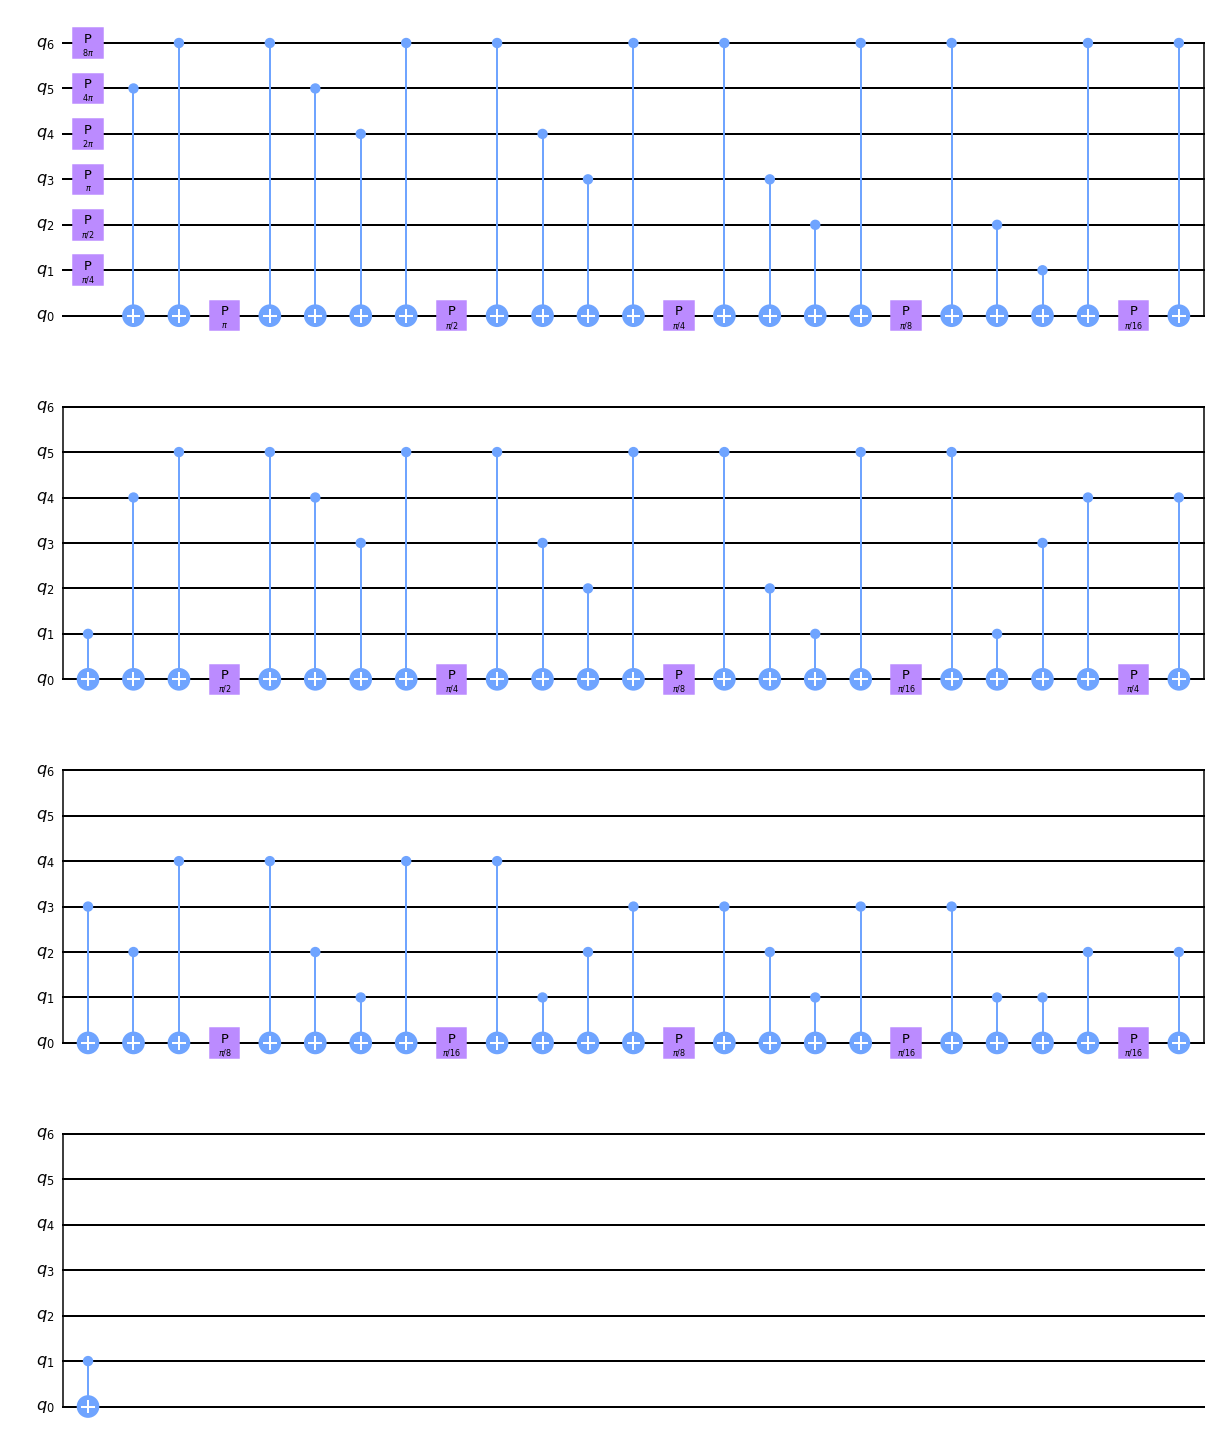

In [2]:
def kin_op(N):
    '''
    The single particle kinetic operator in one dimension.
    
    Args:
        N: number of qubits.
    Returns: 
        qc: the quantum circuit for the kinetic operator.
    '''
    qc = q.QuantumCircuit(N+1)
    #qc.x(N)
    for i in range(1, N+1):
        qc.p((np.pi/4)*(2**(i-1)), i)
    for i in range(1, N+1):
        for j in range(i+1,N+1):
            qc.cx(N+1-j, 0)
            qc.cx(N+1-i, 0)
            qc.p(2*np.pi/(2**(j-1)), 0) 
            qc.cx(N+1-i, 0)
            qc.cx(N+1-j, 0)
            
    #qc.x(N)
    qc = qc.to_gate()
    qc.name = "Kinetic"
    return qc

N = 6
K = kin_op(N)
qc = K.definition
qc.draw('mpl', reverse_bits=True);

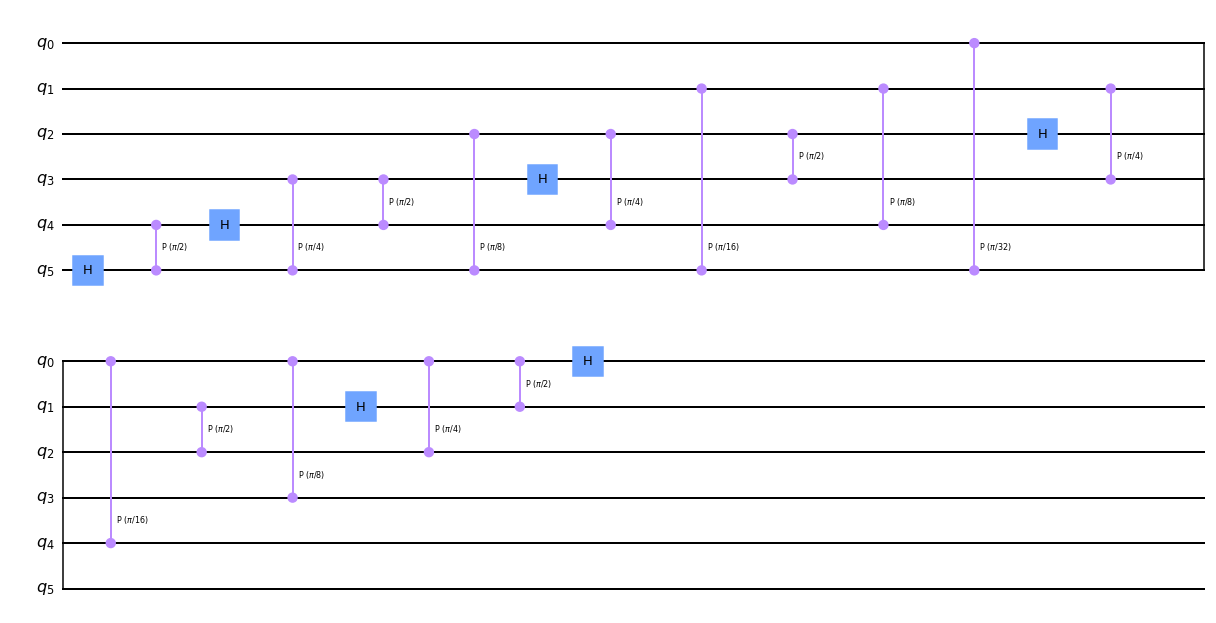

In [3]:
N = 6
qft = QFT(N, do_swaps=False) # Quantum Fourier Transform
qc = qft.decompose()
qc.draw('mpl');

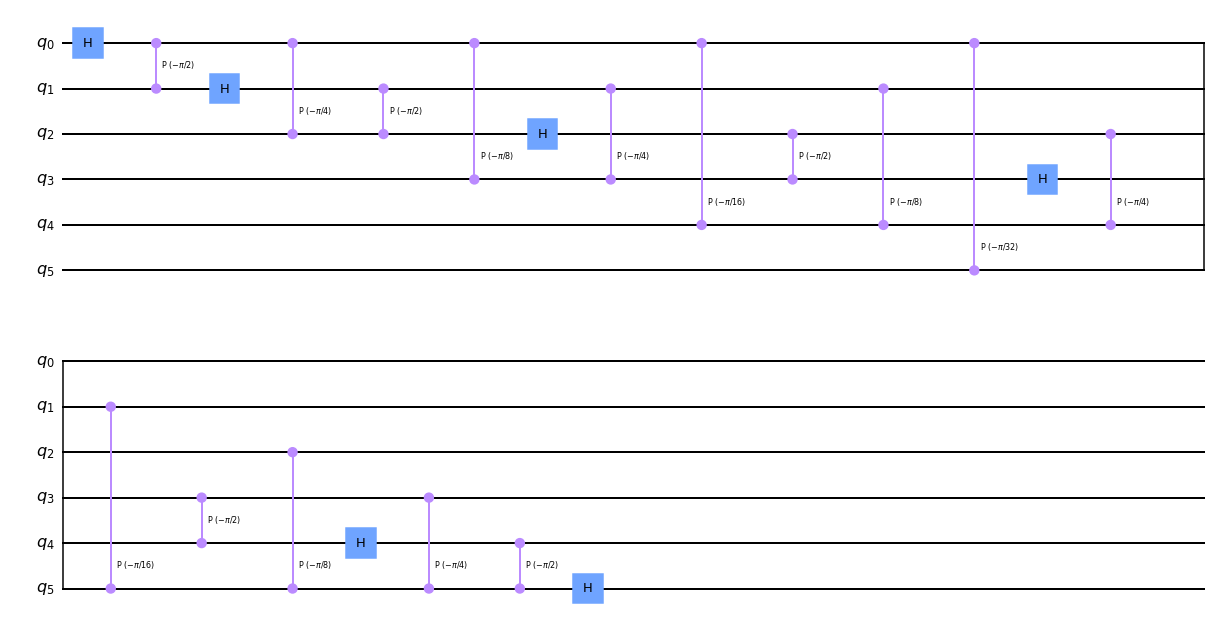

In [4]:
iqft = qft.inverse() # Inverse Quantum Fourier Transform
qc = iqft.decompose()
qc.draw('mpl');

In [5]:
def prob_distro(qc, shots=1024):
    '''
    The measurment probabilities for a given quantum circuit.
    
    Args:
        qc: the quantum circuit.
        shots: the number of repetitions for the measurement process.
    Returns:
        counts: the probability distribution results from measuring each qubit
        in the quantum circuit.
    '''
    backend = q.Aer.get_backend('qasm_simulator')
    results = q.execute(qc, backend=backend, shots=shots).result()
    counts = results.get_counts(qc)
    return counts

# position independent potentials

Consider a quantum particle in a constant potential

\begin{equation} \tag{34}
    V(x) = V_0
\end{equation}

Hence, the potential operator becomes

\begin{equation} \tag{35}
    \mathbf{e}^{-\imath V(x) \Delta t / \hbar} = \mathbf{e}^{-\imath V_0 \Delta t / \hbar}
\end{equation}

which is a global phase to be ignored. Therfore, the potential operator for a particle in constant potential will be composed of one layer of identity gates applied on all the qubits.

The eigenstates for a particle in a step potential are Gaussian wavepackets multiplied by a factor of $\mathbf{e}^{ipx}$

\begin{equation} \tag{36}
    \psi (x) = \frac{1}{\sigma \sqrt{2 \pi}} \mathbf{e}^{-\frac{1}{2}\left( \frac{x - \mu}{\sigma} \right)^2} \mathbf{e}^{ipx}
\end{equation}

The term $\mathbf{e}^{-\frac{1}{2}\left( \frac{x - \mu}{\sigma} \right)^2}$ represents the transmitted wave while the term $\mathbf{e}^{ipx}$ represents the reflected wave. For the free particle $p=0$ and the state will be fully transmitted.

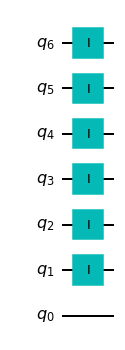

In [6]:
def const_pot_op(N):
    '''
    The single particle constant potential operator in one dimension.
    
    Args:
        N: the number of qubits.
    Returns:
        qc: the quantum circuit for the potential operator.
    '''
    qc = q.QuantumCircuit(N+1)
    for i in range(1, N+1):
        qc.i(i)
    qc = qc.to_gate()
    qc.name = "Potential"
    return qc

N = 6
V = const_pot_op(N)
qc = V.definition
qc.draw('mpl', reverse_bits=True);

In [7]:
def const_pot_wavefunc(x, p, mu, sigma):
    '''
    The wavefunction for a particle in a constant potential.
    
    Args:
        x: the point at which we calculate the wavefunction.
        p: the momentum of the reflected wave e^(ipx).
        mu: the expected value of the particle position.
        sigma: the uncertainty in particle position.
    Returns:
        amp: the normalized probability amplitude.
    '''
    amp = np.exp(-0.5*(((x-mu)/sigma)**2))*np.exp(1j*p*x)
    norm_const = np.sqrt(np.sum(np.abs(amp**2)))
    amp = amp/norm_const
    return amp

In [8]:
def const_pot_evo_alg(N, init_state, reps=1):
    '''
    The quantum algorithm for time-evolution of the schrodinger equation of 
    constant potential in one dimension.
    
    Args:
        N: number of qubits.
        init_state: the quantum state at time t=0.
        reps: the number of times of performing the algorithm.
    Returns:
        circ: the quatnum circuit for the algorithm.
    '''
    # create the quantum circuit
    qr = q.QuantumRegister(N, name="qubit")
    ans = q.QuantumRegister(1, name="ancilla")
    cr = q.ClassicalRegister(N+1, name="cbit")
    circ = q.QuantumCircuit(ans, qr, cr)
    # initialize the quantum circuit 
    circ.initialize(init_state, qr)
    # prform the time-evolution algorithm.
    for i in range(reps):
        # apply potential operator
        V = const_pot_op(N)
        circ.append(V, range(N+1))
        # apply the inverse quantum fourier transform.
        iqft = QFT(N).inverse()
        circ.append(iqft, qr)
        #apply the kinetic operator.
        K = kin_op(N)
        circ.append(K, range(N+1))
        # apply the quantum fourier transform
        qft = QFT(N)
        circ.append(qft, qr)
    # perform the measurement
    circ.measure(range(1,N+1),range(1,N+1))
    return circ

## The Free Particle

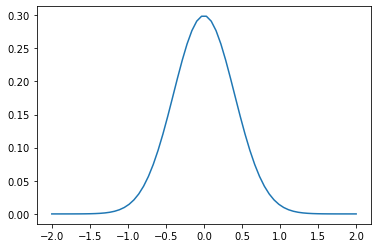

In [9]:
mu = 0
sigma = 0.4
p = 0 
N = 6

x = np.linspace(-2,2, num=2**N)
init_state = const_pot_wavefunc(x, p, mu, sigma)

plt.plot(x,init_state)
plt.show()

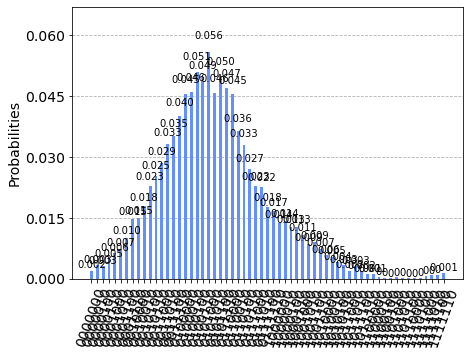

In [10]:
qc = const_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## Particle in a Step Potential

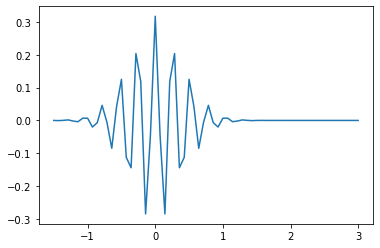

In [11]:
mu = 0
sigma = 0.4
p = 200
N = 6

x = np.linspace(-1.5,3, num=2**N)
init_state = const_pot_wavefunc(x, p, mu, sigma)

plt.plot(x,init_state)
plt.show()

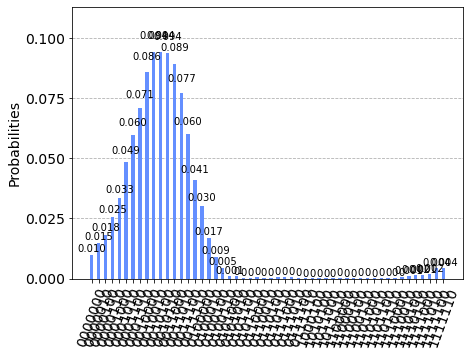

In [12]:
qc = const_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## The Quantum Tunneling

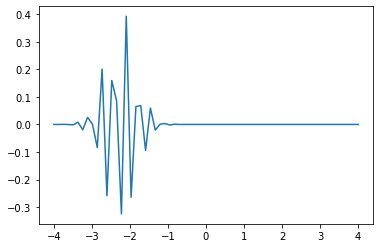

In [13]:
mu = -2.25
sigma = 0.4
p = 30
N = 6

x = np.linspace(-4,4, num=2**N)
init_state = const_pot_wavefunc(x, p, mu, sigma)

plt.plot(x,init_state)
plt.show()

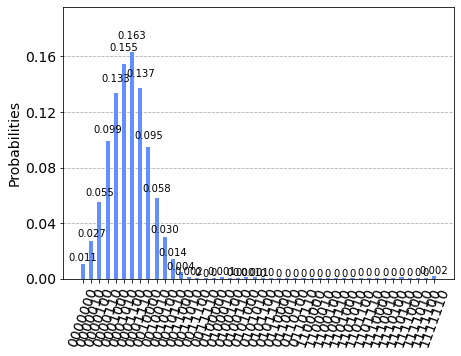

In [14]:
qc = const_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## particle in an Infinite Square Well

The Schrodinger equation for a particle in an infinite potential well

\begin{equation} \tag{37}
    \left[ -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] \psi(x) = E\, \psi(x)
\end{equation}

where, the potential is given by

\begin{equation} \tag{38}
    V(x) = 
    \begin{cases}
        \infty; & x < 0 \\
        0; & 0 \leq x \leq L \\
        \infty; & x > L
    \end{cases}
\end{equation}

The solution of Eq(37) subjected to condition Eq(38) gives the eigenstates for a particle in an infinite potential well

\begin{equation} \tag{39}
    \psi_n(x) = \sqrt{\frac{2}{L}} \sin \left( \frac{n \pi x}{L} \right); \;\;\; n \; \text{is an integer}
\end{equation}

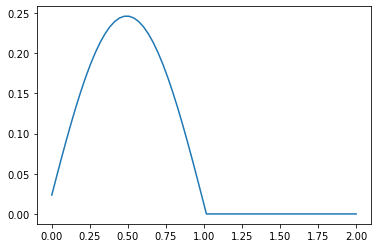

In [15]:
def SW_wavefunc(x, L):
    '''
    The wavefunction for a particle in a square well potential.
    
    Args:
        x: the point at which we calculate the probability amplitue.
        L: the length of the potential well.
        
    Returns: 
        amp: the normalized probability amplitude.
    '''
    amp = np.sin(np.pi*x/L)
    norm_const = np.sqrt(np.sum(amp**2))
    amp = amp/norm_const
    return amp

N = 6
L = 1

x = np.linspace(0, L, num=2**(N-1)+2)
x = np.delete(x,[0,2**(N-1)+1])
x = np.append(x,np.zeros(2**(N-1)))
init_state = SW_wavefunc(x, L) # the initial wavefunction at time t=0.
x_vals = np.linspace(0,2*L, num=2**(N))

plt.plot(x_vals, init_state)
plt.show()

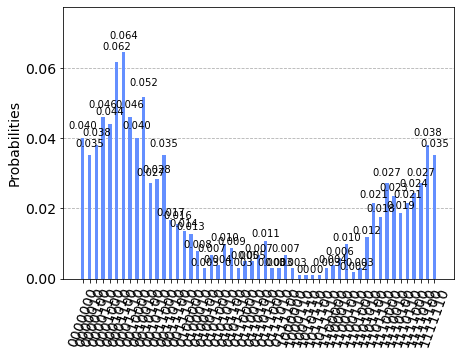

In [16]:
qc = const_pot_evo_alg(N, init_state)
answer = prob_distro(qc)           
plot_histogram(answer);

# Position Dependent Potentials

Recalling, for example, the potential of the Quantum Harmonic Oscillator (QHO)

\begin{equation} \tag{40}
    V(x) = \frac{1}{2} m \omega^2 x^2
\end{equation}

Then, the potential operator of the Quantum Harmonic Oscillator (QHO)

\begin{equation} \tag{41}
    \mathbf{e}^{-\imath V(x) \Delta t/ \hbar} = \mathbf{e}^{-\imath m \omega^2 x^2 \Delta t/ 2 \hbar}
\end{equation}

By Eq(13)-(16), we have

\begin{equation} \tag{42}
    \mathbf{e}^{-\imath V(x) \Delta t / \hbar} = \prod_{j,l=0}^{N-1} \mathbf{e}^{-\imath \delta (k_j 2^j + \beta)( k_l + 2^l + \beta)}
\end{equation}

where,

\begin{equation} \tag{43}
    \delta = \frac{m \omega^2 \alpha^2 \Delta t}{2 \hbar}
\end{equation}

By Eq(19)-(23), we have

\begin{equation} \tag{44}
    \mathbf{e}^{-\imath V(x) \Delta t / \hbar} = \prod_{j,l=0}^{N-1} \mathbf{e}^{\imath (\phi_{j,l} + \phi_j) Z_j} \; \mathbf{e}^{-\imath \phi_{j,l} Z_j Z_l} \; \mathbf{e}^{\imath (\phi_{j,l} + \phi_l) Z_l}
\end{equation}

where,

\begin{equation} \tag{45}
    \phi_{j,l} =  \phi_{l,j} = \delta \,2^{j+l-2}
\end{equation}

and,

\begin{equation} \tag{46}
    \phi_j = \delta\, \beta\, 2^{j-1}
\end{equation}

### Example

For $N=2$, we have

\begin{equation} \tag{47}
    \mathbf{e}^{-\imath V(x) \Delta t / \hbar} = \mathbf{e}^{-\imath \tilde{\phi}_0 Z_0/2} \; \mathbf{e}^{-\imath \tilde{\phi}_{0,1} Z_0 Z_1/2} \; \mathbf{e}^{-\imath \tilde{\phi}_1 Z_1/2}
\end{equation}

where,

\begin{equation} \tag{48}
    \tilde{\phi}_0 = -2(2\phi_{0,0} + 2\phi_{0,1} + 4 \phi_0) = -2(2\phi_{0,0} + 2\phi_{1,0} + 4 \phi_0)
\end{equation}

\begin{equation} \tag{49}
    \tilde{\phi}_{0,1} = 4 \phi_{0,1} = 4 \phi_{1,0}
\end{equation}

\begin{equation} \tag{50}
    \tilde{\phi}_1 = -2(2\phi_{1,1} + 2\phi_{0,1} + 4 \phi_1) = -2(2\phi_{1,1} + 2\phi_{1,0} + 4 \phi_1)
\end{equation}

By Eq(28), we have

\begin{equation} \tag{51}
    \mathbf{e}^{-\imath V(x) \Delta t / \hbar} = \mathbf{e}^{-\imath \tilde{\phi}_0 Z_0/2} \, CX_{0,2} \, CX_{1,2} \, \mathbf{e}^{-\imath \tilde{\phi}_{0,1} Z_2/2} \, CX_{1,2} \, CX_{0,2} \; \mathbf{e}^{-\imath \tilde{\phi}_1 Z_1/2}
\end{equation}

Therefore, the quantum circuit for the kinetic operator of $2$ qubits

<img src="img/qho_op.jpg" width=300 height=300 />

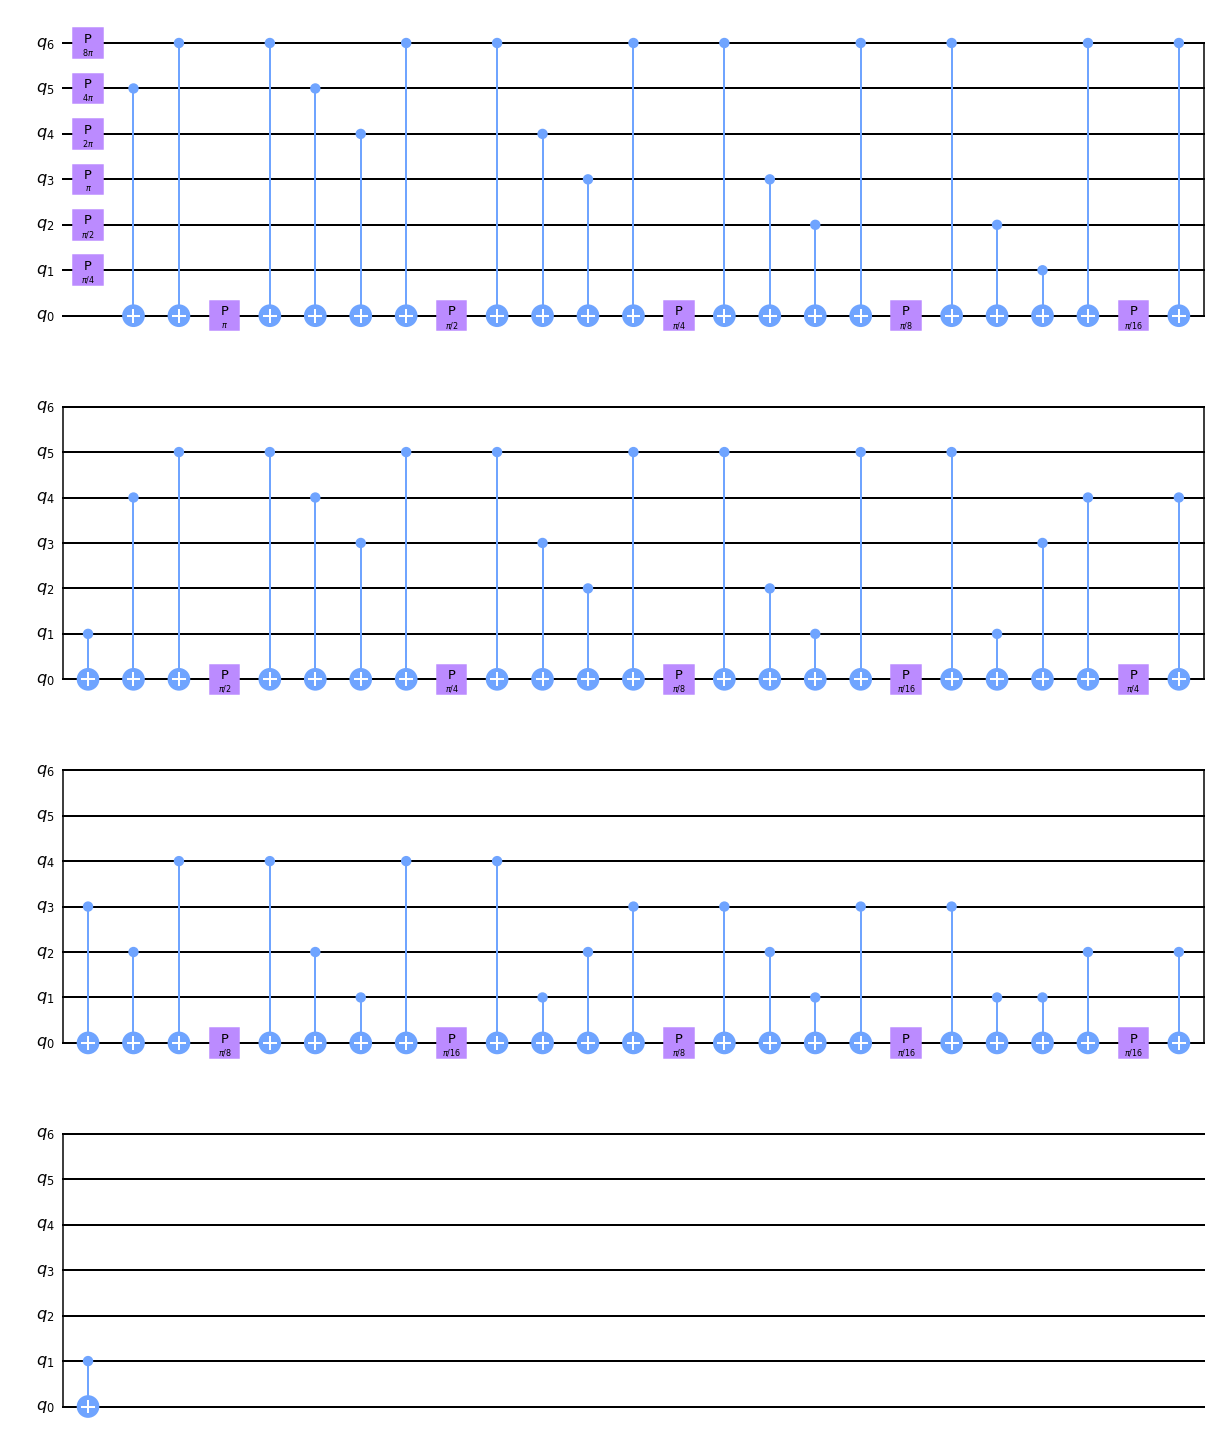

In [17]:
def QHO_pot_op(N):
    '''
    The Quantum Harmonic Oscillator (QHO) potential operator.
    
    Args:
        N: the number of qubits.
    Returns:
        qc: the quantum circuit for the QHO.
    '''
    qc = q.QuantumCircuit(N+1)
    
    for i in range(1, N+1):
        qc.p((np.pi/4)*(2**(i-1)), i)
    for i in range(1, N+1):
        for j in range(i+1,N+1):
            qc.cx(N+1-j, 0)
            qc.cx(N+1-i, 0)
            qc.p(2*np.pi/(2**(j-1)), 0) 
            qc.cx(N+1-i, 0)
            qc.cx(N+1-j, 0)
            
    qc = qc.to_gate()
    qc.name = "Momentum"
    return qc

N = 6
V = QHO_pot_op(N)
qc = V.definition
qc.draw('mpl', reverse_bits=True);

In [18]:
def QHO_pot_evo_alg(N, init_state, reps=1):
    '''
    The algorithm for the time-evolution of the schrodinger equation of 
    Quatnum Harmonic Oscillator (QHO) potential in one dimension.
    
    Args:
        N: number of qubits.
        init_state: the state at time t=0.
        reps: the number of times of performing the algorithm.
    Returns:
        circ: the quantum circuit for the algorithm.
    '''
    # create the quantum circuit
    qr = q.QuantumRegister(N, name="qubit")
    ans = q.QuantumRegister(1, name="ancilla")
    cr = q.ClassicalRegister(N+1, name="cbit")
    circ = q.QuantumCircuit(ans, qr, cr)
    # initialize the quantum circuit 
    circ.initialize(init_state, qr)
    # prform the time-evolution algorithm.
    for i in range(reps):
        # apply potential operator
        V = QHO_pot_op(N)
        circ.append(V, range(N+1))
        # apply the inverse quantum fourier transform.
        iqft = QFT(N).inverse()
        circ.append(iqft, qr)
        #apply the kinetic operator.
        K = kin_op(N)
        circ.append(K, range(N+1))
        # apply the fourier transform
        qft = QFT(N)
        circ.append(qft, qr)
    # perform the measurement
    circ.measure(range(1,N+1),range(1,N+1))
    return circ

## QHO: The Ground State

The zeroth order eigenstate for the Quantum Harmonic Osillator (QHO).

\begin{equation} \tag{52}
    \psi_0(y) = \left ( \frac{a}{\pi} \right)^{1/4} \mathbf{e}^{-y^2/2}
\end{equation}

where, 

\begin{equation} \tag{53}
    a = \frac{m \omega}{\hbar}
\end{equation}

and,

\begin{equation} \tag{54}
  y =  \sqrt{a} x
\end{equation}

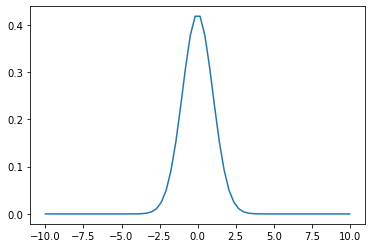

In [19]:
def QHO_wavefunc0(x, a=1):
    '''
    The zeroth order eigenstate for the Quantum Harmonic Osillator (QHO).
    
    Args:
        x: the point at which we calculate the wavefunction.
        a: a = m*omega/hbar
            m: mass of the osillator.
            omega: the angular frequency of the oscillator.
            hbar: Planck's constant.
    Returns:
        amp: the normalized wavefunction of the oscillator.
    '''
    y = np.sqrt(a)*x
    amp = np.exp(-y**2/2)
    norm_const = np.sqrt(np.sum(np.abs(amp**2)))
    amp = amp/norm_const
    return amp

N = 6

x = np.linspace(-10,10, num=2**N)
init_state = QHO_wavefunc0(x)

plt.plot(x,init_state)
plt.show()

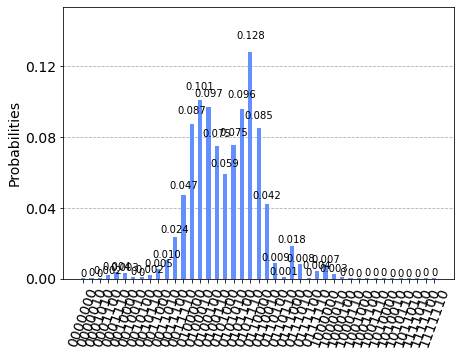

In [20]:
qc = QHO_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## QHO: The First Excited State

The first order eigenstate for the Quantum Harmonic Osillator (QHO).

\begin{equation} \tag{55}
    \psi_1(y) = \left ( \frac{a}{\pi} \right)^{1/4} \sqrt{2}\, y\, \mathbf{e}^{-y^2/2}
\end{equation}

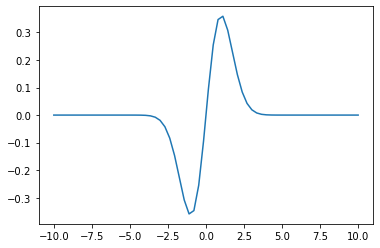

In [21]:
def QHO_wavefunc1(x, a=1):
    '''
    The first order eigenstate for the Quantum Harmonic Osillator (QHO).
    
    Args:
        x: the point at which we calculate the wavefunction.
        a: a = m*omega/hbar
            m: mass of the osillator.
            omega: the angular frequency of the oscillator.
            hbar: Planck's constant.
    Returns:
        amp: the normalized wavefunction of the oscillator.
    '''
    y = np.sqrt(a)*x
    amp = y*np.exp(-y**2/2) 
    norm_const = np.sqrt(np.sum(np.abs(amp**2)))
    amp = amp/norm_const
    return amp

N = 6

x = np.linspace(-10,10, num=2**N)
init_state = QHO_wavefunc1(x)

plt.plot(x,init_state)
plt.show()

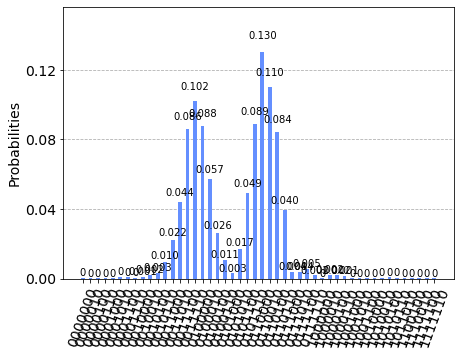

In [22]:
qc = QHO_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## QHO: The Second Excited State

The second order eigenstate for the Quantum Harmonic Osillator (QHO).

\begin{equation} \tag{56}
    \psi_2(y) = \left ( \frac{a}{\pi} \right)^{1/4} \frac{1}{\sqrt{2}}\, \left(2y^2-1 \right)\, \mathbf{e}^{-y^2/2}
\end{equation}

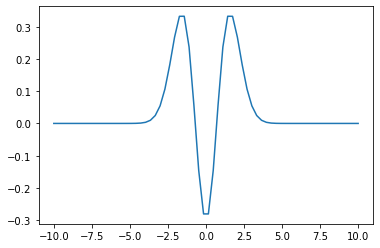

In [23]:
def QHO_wavefunc2(x, a=1):
    '''
    The second order eigenstate for the Quantum Harmonic Osillator (QHO).
    
    Args:
        x: the point at which we calculate the wavefunction.
        a: a = m*omega/hbar
            m: mass of the osillator.
            omega: the angular frequency of the oscillator.
            hbar: Planck's constant.
    Returns:
        amp: the normalized wavefunction of the oscillator.
    '''
    y = np.sqrt(a)*x
    amp = (2*(y**2)-1)*np.exp(-y**2/2)
    norm_const = np.sqrt(np.sum(np.abs(amp**2)))
    amp = amp/norm_const
    return amp

N = 6

x = np.linspace(-10,10, num=2**N)
init_state = QHO_wavefunc2(x)

plt.plot(x,init_state)
plt.show()

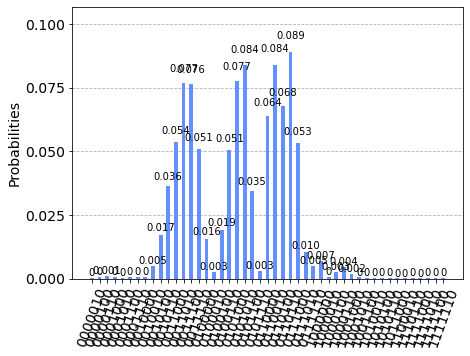

In [24]:
qc = QHO_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

## QHO: The Third Excited State

The third order eigenstate for the Quantum Harmonic Osillator (QHO).

\begin{equation} \tag{57}
    \psi_3(y) = \left ( \frac{a}{\pi} \right)^{1/4} \frac{1}{\sqrt{2}}\, \left(2y^3-3y \right)\, \mathbf{e}^{-y^2/2}
\end{equation}

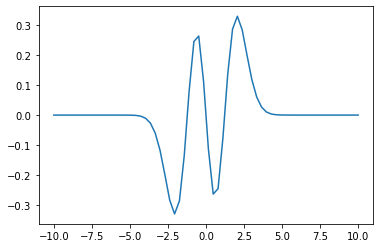

In [25]:
def QHO_wavefunc3(x, a=1):
    '''
    The third order eigenstate for the Quantum Harmonic Osillator (QHO).
    
    Args:
        x: the point at which we calculate the wavefunction.
        a: a = m*omega/hbar
            m: mass of the osillator.
            omega: the angular frequency of the oscillator.
            hbar: Planck's constant.
    Returns:
        amp: the normalized wavefunction of the oscillator.
    '''
    y = np.sqrt(a)*x
    amp = (2*(y**3)-3*y)*np.exp(-y**2/2)
    norm_const = np.sqrt(np.sum(np.abs(amp**2)))
    amp = amp/norm_const
    return amp

N = 6

x = np.linspace(-10,10, num=2**N)
init_state = QHO_wavefunc3(x)

plt.plot(x,init_state)
plt.show()

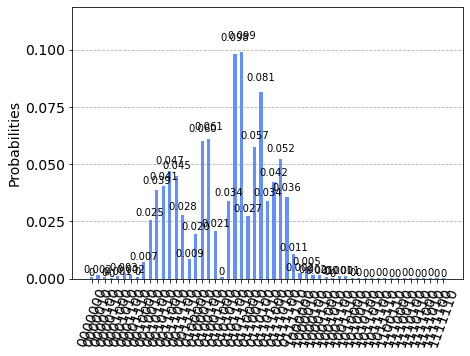

In [26]:
qc = QHO_pot_evo_alg(N, init_state)
answer = prob_distro(qc, shots=10000)           
plot_histogram(answer);

In [27]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
